In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Users/Ricsi/Downloads/dolgok5"))

# Any results you write to the current directory are saved as output.

['results.zip', 'sampleSubmission.csv', 'test.csv.gz', 'train.csv.gz']


In [2]:
df = pd.read_csv("C:/Users/Ricsi/Downloads/dolgok5/train.csv.gz")  # load train data
x = df[['u','g','r','i','z']].values.T  # format x as scipy expects it
y = df['redshift'].values  # format y as scipy expects it

In [3]:
model = KNeighborsRegressor()
model.fit(x.T,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [4]:
testdf =  pd.read_csv("C:/Users/Ricsi/Downloads/dolgok5/test.csv.gz")  # read test data 
x_train = testdf[['u','g','r','i','z']].values  # get test x
y_pred = model.predict(x_train)

# write y in the sample submission table (order is good)
resultdf =  pd.read_csv("C:/Users/Ricsi/Downloads/dolgok5/sampleSubmission.csv") 
resultdf['redshift'] =  y_pred

# save submission (no index column)
resultdf.to_csv("C:/Users/Ricsi/Downloads/dolgok5/linear_regression_baseline.csv", index=False)

In [5]:
from sklearn.model_selection import cross_val_predict
def testReg(model, x, y):
    """Test a model."""
    y_pred = cross_val_predict(model, x, y, cv=5)  
        
    plt.plot(y,y_pred,'.')  # plot data points
    #plt.plot([15,90],[15,90])  # y = x line for reference
    plt.xlabel('age')  # label, labels, labels
    plt.ylabel('predicted age') # and labels

    print('RMSE:',((y-y_pred)**2).mean()**0.5)  # primary metric
    print('Pearson corr:',np.corrcoef(y,y_pred)[0,1])  # another one

RMSE: 0.0825632027895938
Pearson corr: 0.9117102614717459


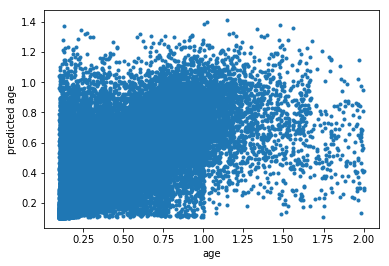

In [6]:
testReg(KNeighborsRegressor(), x.T, y)